## E-commerce Business
**Will Visitor end it purchasing? YES/NO**
<br>
three main types of varaibles
<br>
1.Visitor related
<br>
2.Page related
<br>
3.Date of purchase related
<br> 
**visitor related**

"Administrative" : Administrative pages visitor visited
<br>
"Administrative Duration": How long stayed in Administrative pages
<br>
"Informational" : Informational pages visitor visited
<br>
"Informational Duration" : How long stayed in Informational pages
<br>
"Product Related" : Product Related pages visitor visited
<br>
"Product Related Duration" : How long stayed in Product Related pages
<br>
"VisitorType" : returning,new,Others


**Page Related**

 "Bounce Rate" :percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session
 <br> 
 "Exit Rate"  : The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session
 <br>
 "Page Value": The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction
 
  <br>
**Time of Purchase Related**
 <br>
"Special Day"
 <br>
"Month"
<br>
"Weekend"
<br>


**Others**

OperatingSystems
<br>
"Browser"
<br>
"Region"
<br>
"TrafficType"
<br>

 


In [182]:
import numpy as np
import pandas as pd

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

from sklearn.model_selection import GridSearchCV



In [327]:
df=pd.read_csv(r'C:\Users\lfakh\Downloads\coding_round_data.csv')

In [299]:
100*df['Revenue'].value_counts().values/df['Revenue'].value_counts().sum()


array([84.52554745, 15.47445255])

In [328]:
df["Revenue"] = df["Revenue"].astype(int)
df["Weekend"] = df["Weekend"].astype(int)


In [301]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [324]:
df['InformationalRate']=df['Informational_Duration']/1+df['Informational']
df['ProductRelatedRate']=df['ProductRelated_Duration']/1+df['ProductRelated']



In [325]:
df.corr()['Revenue'].sort_values()

ExitRates                       -0.207071
BounceRates                     -0.150673
VisitorType_Returning_Visitor   -0.103843
SpecialDay                      -0.082305
Month_May                       -0.078320
Month_Mar                       -0.063941
Month_Feb                       -0.047114
Month_Dec                       -0.033112
Month_June                      -0.023112
OperatingSystems                -0.014668
Region                          -0.011595
TrafficType                     -0.005113
Month_Jul                       -0.001036
VisitorType_Other                0.007715
Month_Aug                        0.010959
Month_Sep                        0.019983
Browser                          0.023984
Weekend                          0.029295
Month_Oct                        0.032666
AllRates                         0.041575
Informational_Duration           0.070345
InformationalRate                0.070806
Administrative_Duration          0.093587
AdministrativeRate               0

In [329]:
df=pd.get_dummies(df, columns=['VisitorType','Month'])

In [330]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [290]:
y_train.value_counts()/y_train.value_counts().sum() #change this. this is not the same distribution

0    0.848236
1    0.151764
Name: Revenue, dtype: float64

## Base Line Model

In [321]:

logreg=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
M_LG=logreg.fit(X_train,y_train)

In [322]:
y_pred_train=M_LG.predict(X_train)
y_pred_test=M_LG.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

AUC Training  0.6799688776381495
AUC Testing 0.6618004866180048


## Train XGboost with default hyperprameters

In [33]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.3,gamma=0,max_depth=6,min_child_weight=0,scale_pos_weight=0,n_jobs=4,n_estimators=100,random_state=7)

M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

In [34]:
y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)

fpr_train,tpr_train,threshols_train=metrics.roc_curve(y_train,y_pred_train)
fpr_test,tpr_test,threshols_test=metrics.roc_curve(y_test,y_pred_test)
print('AUC Training ',metrics.auc(fpr_train,tpr_train))
print('AUC Testing',metrics.auc(fpr_test,tpr_test))

AUC Training  0.5
AUC Testing 0.5


In [332]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.3,gamma=0,max_depth=6,min_child_weight=0,scale_pos_weight=6,n_jobs=4,n_estimators=100,random_state=7)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)
fpr_train,tpr_train,threshols_train=metrics.roc_curve(y_train,y_pred_train)
fpr_test,tpr_test,threshols_test=metrics.roc_curve(y_test,y_pred_test)

print('AUC Training ',metrics.auc(fpr_train,tpr_train))
print('AUC Testing',metrics.auc(fpr_test,tpr_test))

AUC Training  0.991095972272021
AUC Testing 0.7985401459854015


## Grid Search

In [277]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'scale_pos_weight': [6],
    'eta':[ 0.01,0.05, 0.1 ],
    'gamma':[2,4,6],
    'max_depth':[4],
    'min_child_weight':[6],
    'n_estimators': [10,20,30,40,50]
    
    

}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 2,
    verbose=True
)

grid_search.fit(X_train, y_train)


model=XGBClassifier(**grid_search.best_params_)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")
y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)

auc_train=metrics.roc_auc_score(y_train, y_pred_train)
auc_test=metrics.roc_auc_score(y_test, y_pred_test)



print('AUC Training ',auc_train)
print('AUC Testing',auc_test)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
[20:25:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Training  0.8700891684169103
AUC Testing 0.8603406326034063


In [264]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=6, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [333]:
model=XGBClassifier(booster='gbtree',objective='binary:logistic',eta=0.1,gamma=6,max_depth=4,min_child_weight=6,scale_pos_weight=6,n_jobs=4,n_estimators=40,random_state=7)
M=model.fit(X_train, y_train,verbose=True,eval_metric="auc")

y_pred_train=M.predict(X_train)
y_pred_test=M.predict(X_test)
fpr_train,tpr_train,threshols_train=metrics.roc_curve(y_train,y_pred_train)
fpr_test,tpr_test,threshols_test=metrics.roc_curve(y_test,y_pred_test)

print('AUC Training ',metrics.auc(fpr_train,tpr_train))
print('AUC Testing',metrics.auc(fpr_test,tpr_test))

AUC Training  0.871150931000282
AUC Testing 0.8554744525547445


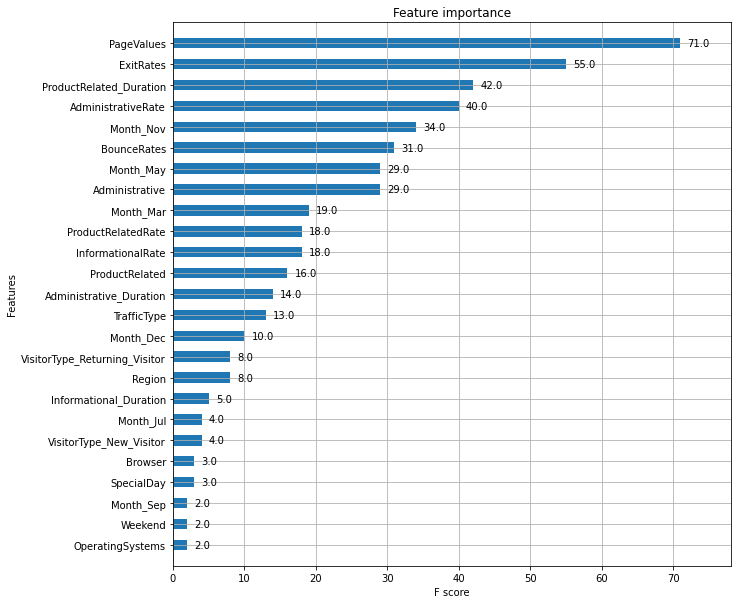

In [307]:
from xgboost import plot_importance
fig,ax=plt.subplots(figsize=(10,10))
plot_importance(model,height=0.5,ax=ax,importance_type='weight')
pyplot.show()

In [262]:
M.get_booster().dump_model('AllBoosters')